In [1]:
# Course DSC 650 - Data Mining
# Name - Vikas Ranjan
# Assignment - Assignment 10.2

In [2]:
# import Libraries
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense 
import os
from contextlib import redirect_stdout
import time
start_time = time.time()

In [3]:
results_dir = Path('results').joinpath('model_1') 
results_dir.mkdir(parents=True, exist_ok=True) 
imdb_dir = Path('imdb/aclImdb/')
test_dir = os.path.join(imdb_dir, 'test') 
train_dir = os.path.join(imdb_dir, 'train')

In [4]:
training_samples = 300
maxlen = 100
max_words = 1000
embedding_dim = 100
training_samples = 200
validation_samples = 10000

In [5]:
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type) 
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8") 
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0) 
            else:
                labels.append(1)

In [6]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 87393 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [7]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [8]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# Save the summary to file
summary_file = results_dir.joinpath('Assignment_10.2_ModelSummary.txt') 
with open(summary_file, 'w') as f:
    with redirect_stdout(f): 
        model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
result_model_file = results_dir.joinpath('pre_trained_glove_model.h5')
model.save_weights(result_model_file)

Epoch 1/10
7/7 [==============================] - 1s 155ms/step - loss: 0.6940 - acc: 0.5182 - val_loss: 0.6931 - val_acc: 0.5210
Epoch 2/10
7/7 [==============================] - 1s 103ms/step - loss: 0.5191 - acc: 0.9297 - val_loss: 0.6952 - val_acc: 0.5229
Epoch 3/10
7/7 [==============================] - 1s 103ms/step - loss: 0.3220 - acc: 0.9766 - val_loss: 0.7047 - val_acc: 0.5270
Epoch 4/10
7/7 [==============================] - 1s 103ms/step - loss: 0.1764 - acc: 0.9786 - val_loss: 0.7096 - val_acc: 0.5318
Epoch 5/10
7/7 [==============================] - 1s 99ms/step - loss: 0.0897 - acc: 0.9963 - val_loss: 0.7085 - val_acc: 0.5315
Epoch 6/10
7/7 [==============================] - 1s 97ms/step - loss: 0.0510 - acc: 1.0000 - val_loss: 0.7193 - val_acc: 0.5290
Epoch 7/10
7/7 [==============================] - 1s 105ms/step - loss: 0.0301 - acc: 1.0000 - val_loss: 0.7416 - val_acc: 0.5313
Epoch 8/10
7/7 [==============================] - 1s 105ms/step - loss: 0.0161 - acc: 1.0000

<Figure size 432x288 with 0 Axes>

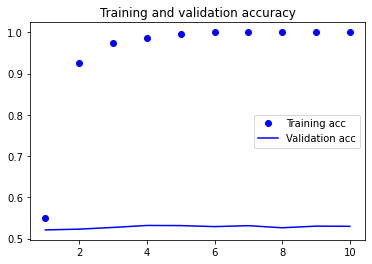

<Figure size 432x288 with 0 Axes>

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

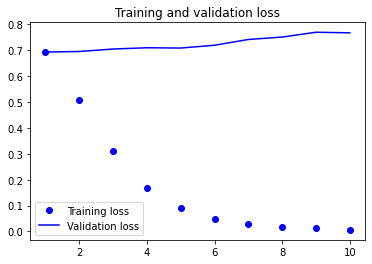

In [11]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
img_file = results_dir.joinpath('Assignment_10.2_Model Accuracy Validation.png')
plt.savefig(img_file)
plt.show()